# <center><font color="Deep Blue">**Solar Radiation Prediction**</font></center>

##**Solario**
**1. Company Introduction**<br>

Your client for this project is a major producer of solar energy.

Recently the company has taken an initiative to make waste-free power source which could be a potential leap towards protecting the environment and climate change.

They have partnered with NASA to get a hold on the meteorological data so that they could build an efficient system to measure solar radiation.
<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTO5mjgBwD939l_GR3R66_ykLLDCVjt_akx5Q&usqp=CAU" width="540" height="340">

They have been working on an app which gives updates on solar radiation throughout different timestamps during the day.

**Current Scenario**

Solar radiation is often defined as the energy reaching the earth from the sun.

People have been measuring the energy coming from the sun for centuries, and today more people are measuring solar radiation than ever before.

But we are still in need of an efficient and accurate way of measuring solar radiation.


##**2.Problem Statement**

The current process suffers from the following problems:

The solar radiation is dependent on Humidity and Temperature.
Measuring solar radiation using different devices requires a lot of manpower and resources. 
<img src="https://i.ytimg.com/vi/HpoSNfbHf2c/hqdefault.jpg">

It takes a lot of time fixing the sensors and interpreting the readings from the different devices which becomes inefficient as time goes by.

The company has hired you as data science consultants. They want to automate the process of predicting the compressive strength of the concrete, based on the materials used.<br>
<img src="https://th.bing.com/th/id/OIP.tHSkJ2rc6E7370LJdQByOQAAAA?w=178&h=180&c=7&r=0&o=5&dpr=1.3&pid=1.7" width="540" height="340"><br>
Solar radiation is measured by its energy power transferred per unit area (watts / m 2). In general, the Earth receives less than 0.5 × 10 −9 of the energy of its radiation from the Sun. The functional unit that describes solar radiation reaching Earth is solar irradiance, or unit of power per square meter (w / m²). See more


**Your Role**

You are given a dataset containing measurements for the past 4 months.

Your task is to build a regression model using the dataset.

Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. 

You need to build the best possible model.

**Project Deliverables**

Deliverable: Solar Radiation Prediction.<br>
Machine Learning Task: Regression<br>
Target Variable: Radiation<br>
Win Condition: N/A (best possible model)

**Evaluation Metric**

The model evaluation will be based on the RMSE score.

##<center><font color="Deep Blue">**3.About the Dataset**</font></center>
The **dataset** contains **4 months** of the **measurements.**

The data comes directly from NASA’s weather research lab based on actual reading taken by their sensors situated at different locations.

This is the data that we have to predict for future samples.

The dataset is divided into two parts: Train and Test sets.

**Train Set:**
The train set contains 26148 rows and 12 columns.
The last column Radiation is the target variable.

**Test Set:**
The test set contains 6538 rows and 11 columns.
The test set doesn’t contain the Radiation column.
It needs to be predicted for the test set.

**Sample Submission File:**
A sample submission csv file named sample_submission.csv is also provided with the dataset.
This sample submission file contains the format of the final predictions submission csv file that you need to upload via the Upload Submission tab.

**Dataset Download Link**
The dataset can be downloaded from this
[link](https://www.insaid.co/wp-content/uploads/2021/08/Project-2-Regression-Solar-Radiation-Prediction.zip)


In [ ]:
!unzip "/content/Project-2-Regression-Solar-Radiation-Prediction.zip"

Archive:  /content/Project-2-Regression-Solar-Radiation-Prediction.zip
  inflating: sample_submission.csv   
  inflating: solar_test.csv          
  inflating: solar_train.csv         


##<font color="orange"> **Importing necessary libraires**</font>

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [5]:
train=pd.read_csv("/content/solar_train.csv")
train.head()

,Id,UNIXTime,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Radiation
0,4152,1473879005,9/14/2016 12:00:00 AM,08:50:05,57,30.45,68,26.70,4.50,06:10:00,18:26:00,680.04
1,13047,1476293121,10/12/2016 12:00:00 AM,07:25:21,50,30.47,96,144.96,10.12,06:16:00,18:02:00,277.37
2,7420,1477993220,10/31/2016 12:00:00 AM,23:40:20,47,30.48,56,119.52,3.37,06:23:00,17:49:00,1.29
3,6508,1473013505,9/4/2016 12:00:00 AM,08:25:05,57,30.47,93,38.61,2.25,06:08:00,18:35:00,544.75
4,29110,1481885434,12/16/2016 12:00:00 AM,00:50:34,41,30.23,103,177.55,2.25,06:50:00,17:46:00,1.22


In [6]:
import datetime

#Date

train['Year'] = pd.DatetimeIndex(train['Data']).year
train['Month'] = pd.DatetimeIndex(train['Data']).month
train['Day'] = pd.DatetimeIndex(train['Data']).day
train.head()

#Time 

train['Hour'] = pd.DatetimeIndex(train['Time']).hour
train['Minute'] = pd.DatetimeIndex(train['Time']).minute
train['Second'] = pd.DatetimeIndex(train['Time']).second

train.head()


train['SunPerDay'] = pd.DatetimeIndex(train['TimeSunSet']) - pd.DatetimeIndex(train['TimeSunRise'])
train.head()

train['SunPerDayHours'] = pd.DatetimeIndex(train['TimeSunSet']).hour - pd.DatetimeIndex(train['TimeSunRise']).hour 


In [ ]:
test=pd.read_csv("/content/solar_test.csv")
test.head()

,Id,UNIXTime,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,22107,1478720107,11/9/2016 12:00:00 AM,09:35:07,59,30.47,44,312.67,3.37,06:28:00,17:45:00
1,3780,1474063503,9/16/2016 12:00:00 AM,12:05:03,59,30.48,83,38.01,6.75,06:10:00,18:25:00
2,13651,1476109221,10/10/2016 12:00:00 AM,04:20:21,47,30.39,78,213.62,5.62,06:16:00,18:03:00
3,30473,1481475056,12/11/2016 12:00:00 AM,06:50:56,45,30.40,98,176.63,4.50,06:47:00,17:44:00
4,9084,1477493117,10/26/2016 12:00:00 AM,04:45:17,45,30.40,34,175.89,6.75,06:21:00,17:52:00


In [ ]:
train.shape

(26148, 12)

In [ ]:
train.describe()

,Id,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Radiation
count,26148.000000,2.614800e+04,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000,26148.000000
mean,16337.578668,1.478046e+09,51.104865,30.422835,75.005239,143.259970,6.248521,208.044780
std,9449.975676,3.005885e+06,6.213912,0.054724,25.993102,82.988177,3.484166,316.090247
min,0.000000,1.472724e+09,34.000000,30.190000,11.000000,0.090000,0.000000,1.130000
25%,8125.750000,1.475533e+09,46.000000,30.400000,56.000000,81.977500,3.370000,1.230000
50%,16379.000000,1.478038e+09,50.000000,30.430000,85.000000,147.645000,5.620000,2.710000
75%,24507.250000,1.480478e+09,55.000000,30.460000,97.000000,179.220000,7.870000,358.945000
max,32685.000000,1.483265e+09,71.000000,30.560000,103.000000,359.950000,39.370000,1601.260000


In [ ]:
test.shape

(6538, 11)

In [ ]:
test.describe()

,Id,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
count,6538.000000,6.538000e+03,6538.000000,6538.000000,6538.000000,6538.000000,6538.000000
mean,16362.182319,1.478052e+09,51.096819,30.423054,75.060569,144.409084,6.225263
std,9379.483802,3.001868e+06,6.150349,0.054474,25.980624,83.880937,3.515794
min,6.000000,1.472725e+09,35.000000,30.190000,8.000000,0.100000,0.000000
25%,8317.250000,1.475598e+09,46.000000,30.400000,56.000000,82.875000,3.370000
50%,16213.500000,1.477988e+09,50.000000,30.430000,85.000000,148.055000,5.620000
75%,24536.750000,1.480591e+09,55.000000,30.460000,97.000000,179.807500,7.870000
max,32683.000000,1.483261e+09,71.000000,30.560000,103.000000,359.940000,40.500000


In [ ]:
train.isnull().sum()#checking for null values

Id                        0
UNIXTime                  0
Data                      0
Time                      0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
Radiation                 0
dtype: int64

In [ ]:
test.isnull().sum()

Id                        0
UNIXTime                  0
Data                      0
Time                      0
Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
TimeSunRise               0
TimeSunSet                0
dtype: int64

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26148 entries, 0 to 26147
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      26148 non-null  int64  
 1   UNIXTime                26148 non-null  int64  
 2   Data                    26148 non-null  object 
 3   Time                    26148 non-null  object 
 4   Temperature             26148 non-null  int64  
 5   Pressure                26148 non-null  float64
 6   Humidity                26148 non-null  int64  
 7   WindDirection(Degrees)  26148 non-null  float64
 8   Speed                   26148 non-null  float64
 9   TimeSunRise             26148 non-null  object 
 10  TimeSunSet              26148 non-null  object 
 11  Radiation               26148 non-null  float64
dtypes: float64(4), int64(4), object(4)
memory usage: 2.4+ MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6538 entries, 0 to 6537
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Id                      6538 non-null   int64  
 1   UNIXTime                6538 non-null   int64  
 2   Data                    6538 non-null   object 
 3   Time                    6538 non-null   object 
 4   Temperature             6538 non-null   int64  
 5   Pressure                6538 non-null   float64
 6   Humidity                6538 non-null   int64  
 7   WindDirection(Degrees)  6538 non-null   float64
 8   Speed                   6538 non-null   float64
 9   TimeSunRise             6538 non-null   object 
 10  TimeSunSet              6538 non-null   object 
dtypes: float64(3), int64(4), object(4)
memory usage: 562.0+ KB


In [128]:
train.columns

Index(['Id', 'UNIXTime', 'Data', 'Time', 'Temperature', 'Pressure', 'Humidity',
       'WindDirection(Degrees)', 'Speed', 'TimeSunRise', 'TimeSunSet',
       'Radiation', 'Year', 'Month', 'Day', 'Hour', 'Minute', 'Second',
       'SunPerDay', 'SunPerDayHours'],
      dtype='object')

In [130]:
train.duplicated().sum()

0

In [ ]:
train_data1=['Id', 'UNIXTime', 'Data', 'Time', 'Radiation','Temperature', 'Pressure', 'Humidity','WindDirection(Degrees)', 'Speed', 'TimeSunRise', 'TimeSunSet']
train=train.reindex(columns=train_data1)
train.head()

,Id,UNIXTime,Data,Time,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet
0,4152,1473879005,9/14/2016 12:00:00 AM,08:50:05,680.04,57,30.45,68,26.70,4.50,06:10:00,18:26:00
1,13047,1476293121,10/12/2016 12:00:00 AM,07:25:21,277.37,50,30.47,96,144.96,10.12,06:16:00,18:02:00
2,7420,1477993220,10/31/2016 12:00:00 AM,23:40:20,1.29,47,30.48,56,119.52,3.37,06:23:00,17:49:00
3,6508,1473013505,9/4/2016 12:00:00 AM,08:25:05,544.75,57,30.47,93,38.61,2.25,06:08:00,18:35:00
4,29110,1481885434,12/16/2016 12:00:00 AM,00:50:34,1.22,41,30.23,103,177.55,2.25,06:50:00,17:46:00


In [ ]:
train_data = train.iloc[:,4:10]
train_data.head()

,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,680.04,57,30.45,68,26.70,4.50
1,277.37,50,30.47,96,144.96,10.12
2,1.29,47,30.48,56,119.52,3.37
3,544.75,57,30.47,93,38.61,2.25
4,1.22,41,30.23,103,177.55,2.25


In [ ]:
test.columns

Index(['Id', 'UNIXTime', 'Data', 'Time', 'Temperature', 'Pressure', 'Humidity',
       'WindDirection(Degrees)', 'Speed', 'TimeSunRise', 'TimeSunSet'],
      dtype='object')

In [142]:
!pip install pandas-profiling==2.7.1 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 252 kB 5.0 MB/s 
     |████████████████████████████████| 58 kB 5.0 MB/s 
     |████████████████████████████████| 679 kB 45.0 MB/s 
     |████████████████████████████████| 4.7 MB 58.2 MB/s 
     |████████████████████████████████| 296 kB 72.4 MB/s 
     |████████████████████████████████| 1.6 MB 63.6 MB/s 
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=ca1433745983488da117187c847a73679bd4591aa2592990c505b516d8f8e9c6
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
Successfully built htmlmin
  Attempting uninstall: pandas-profiling
    Found existing installation: pandas-profiling 1.4.1
    Uninstalling pandas-profiling-1.4.1:
      Successfully uninstalled pandas-profiling-1.4.1


In [8]:
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
profile = ProfileReport(df=train)
profile.to_file(output_file='Solar Radiation Prediction Pre Profiling Report.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/32 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


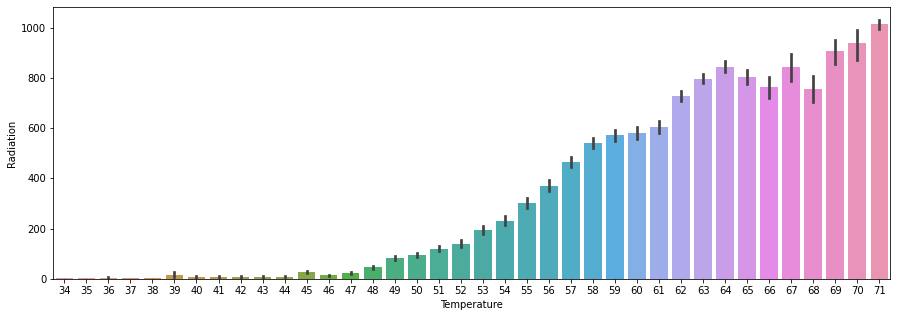

In [83]:
fig2 = plt.figure(figsize=(15,5))
sns.barplot(x=train['Temperature'],y=train['Radiation'])

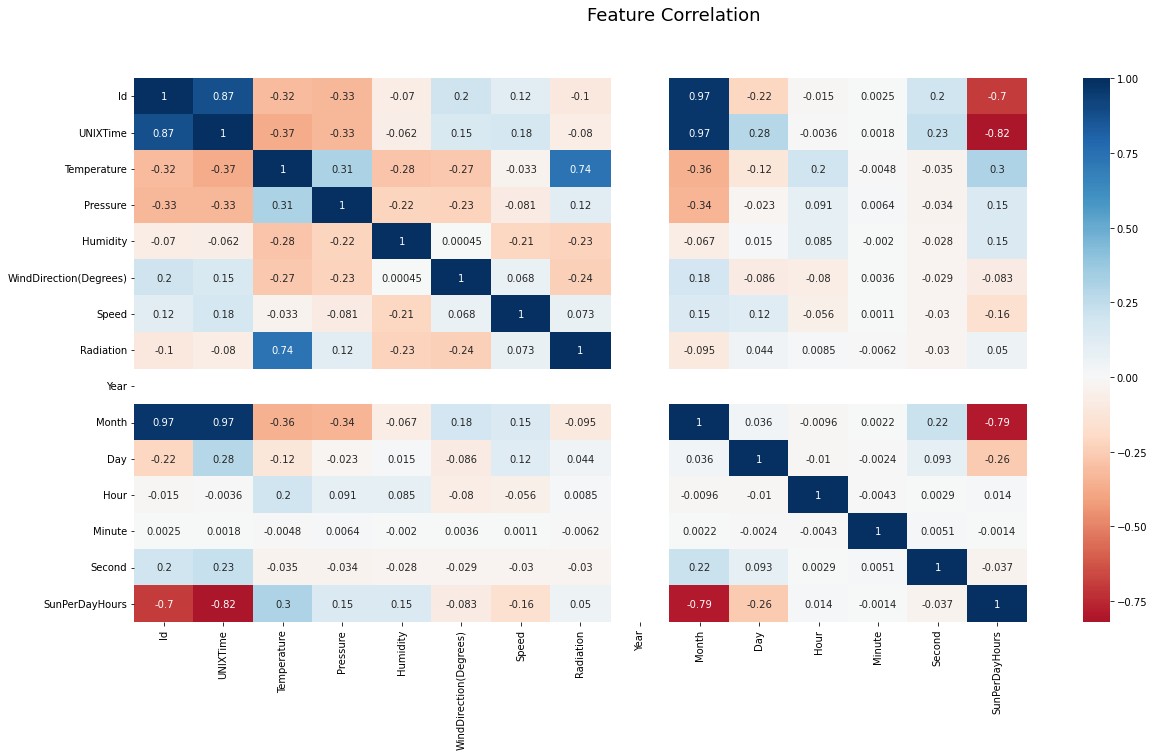

In [89]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Feature Correlation', fontsize=18)
sns.heatmap(train.corr(), annot=True, cmap='RdBu', center=0)

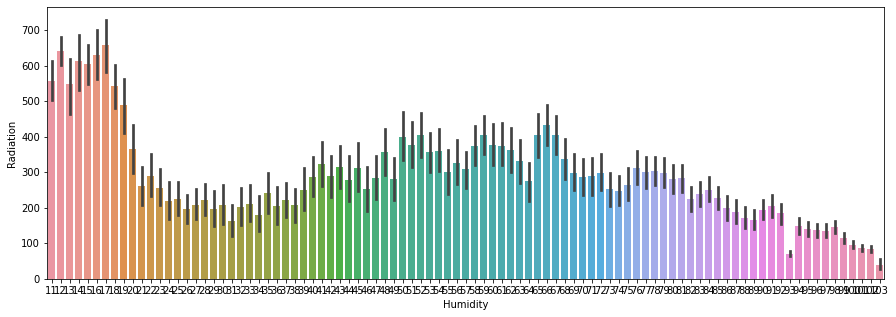

In [91]:
fig3 = plt.figure(figsize=(15,5))
sns.barplot(x=train['Humidity'],y=train['Radiation'])

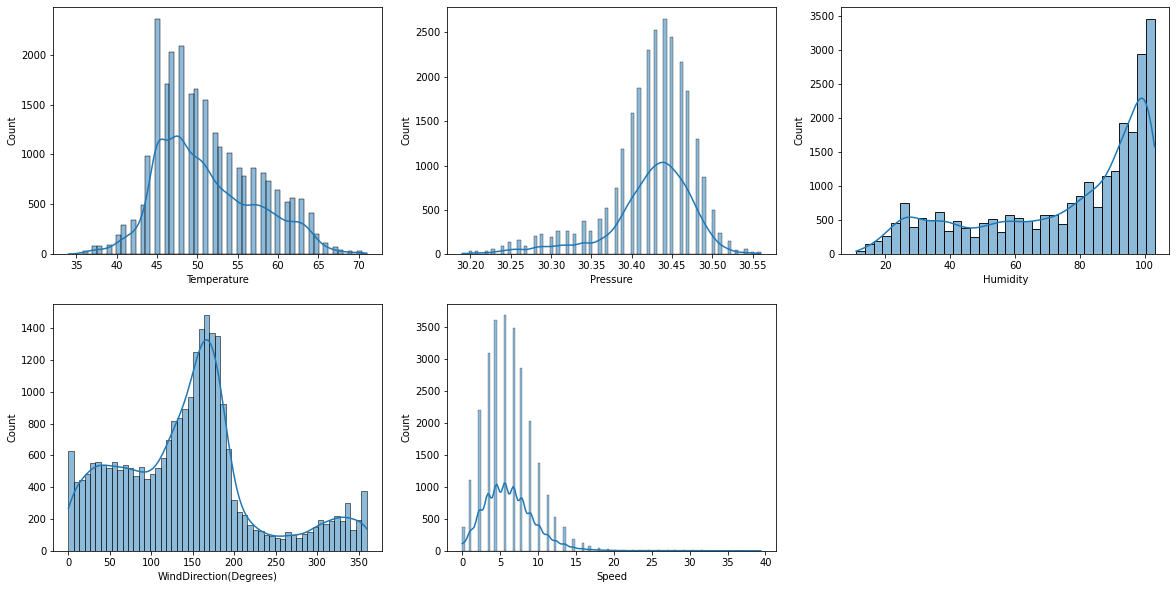

In [92]:
plt.figure(figsize=(20,10))

distr = train[["Temperature","Pressure","Humidity","WindDirection(Degrees)","Speed"]]

for i, column in enumerate(distr):
    plt.subplot(2,3,i+1)
    sns.histplot(distr[column],kde=True)


In [ ]:
test_data=test.iloc[:,4:9]
test_data.head()

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
0,59,30.47,44,312.67,3.37
1,59,30.48,83,38.01,6.75
2,47,30.39,78,213.62,5.62
3,45,30.40,98,176.63,4.50
4,45,30.40,34,175.89,6.75


In [ ]:
train_data['Radiation'].describe()

count    26148.000000
mean       208.044780
std        316.090247
min          1.130000
25%          1.230000
50%          2.710000
75%        358.945000
max       1601.260000
Name: Radiation, dtype: float64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-10.0, 1602.0)

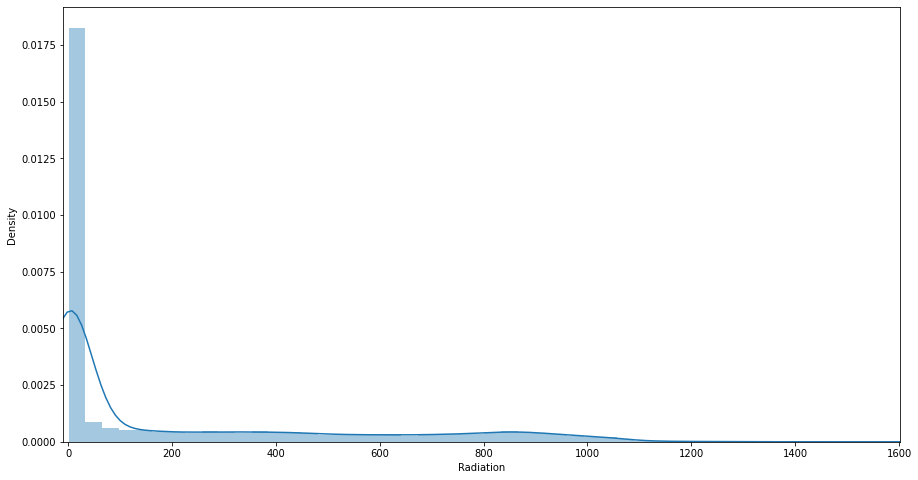

In [ ]:
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(train_data['Radiation'])
plt.xlim([-10,1602])

Cleary most of data remains on the left side of plot.

We have a lot of noise here, but we are neglecting it(yes accuracy would decrease), as our focus is on different evaluation measures.



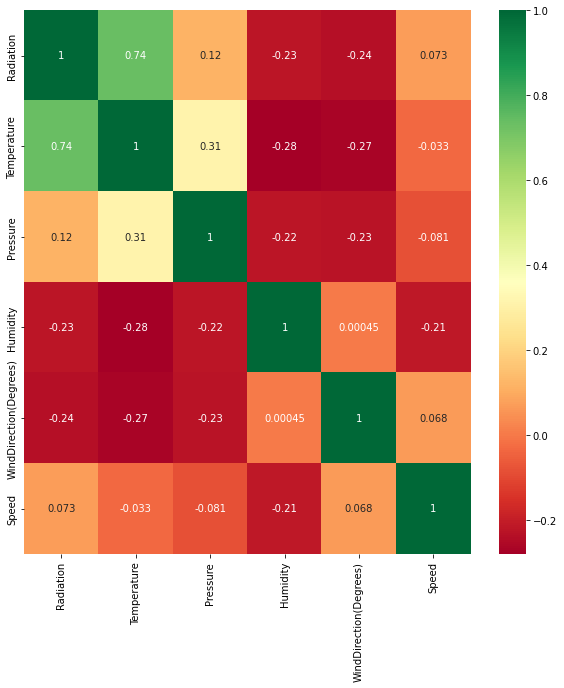

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(train_data.corr(),annot=True,cmap='RdYlGn')
plt.show()

<Figure size 1440x720 with 0 Axes>

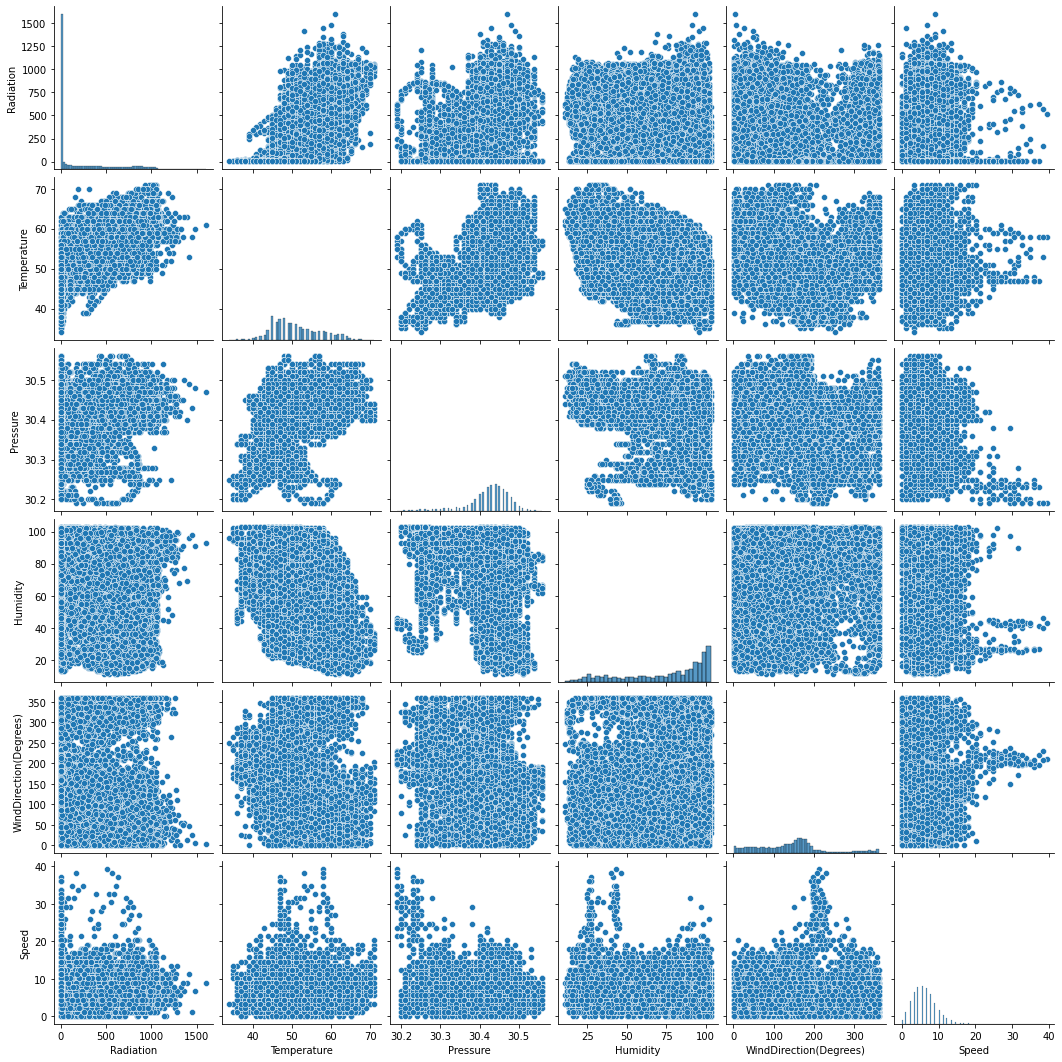

In [74]:
figure= plt.figure(figsize=(20,10))
sns.pairplot(train_data)

In [ ]:
X = train_data.iloc[:,1:]
y = train_data.iloc[:,0]

In [ ]:
X_test_data = test_data.iloc[:,1:]
y_test_data = test_data.iloc[:,0]

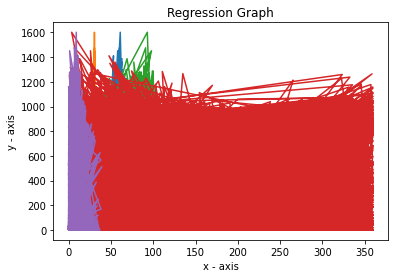

In [ ]:
import matplotlib.pyplot as plt
import math
 
# plotting the points 
plt.plot(X, y)
 
# naming the x axis
plt.xlabel('x - axis')
 
# naming the y axis
plt.ylabel('y - axis')
 
# giving a title to my graph
plt.title('Regression Graph')
 
# function to show the plot
plt.show()

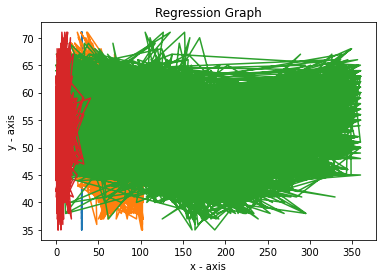

In [ ]:
plt.plot(X_test_data, y_test_data)
 
# naming the x axis
plt.xlabel('x - axis')
 
# naming the y axis
plt.ylabel('y - axis')
 
# giving a title to my graph
plt.title('Regression Graph')
 
# function to show the plot
plt.show()

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

In [99]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_test_data, y_test_data, test_size = 0.2, random_state = 25)

In [100]:
from sklearn.linear_model import LinearRegression
regresor= LinearRegression()
regresor.fit(X_train, y_train)
regresor_pred = regresor.predict(X_test)

In [101]:
regresor= LinearRegression()
regresor.fit(X_train1, y_train1)
regresor_pred1 = regresor.predict(X_test1)

In [102]:
mae_list = []
mse_list = []
r2_list = []
var_list = []
max_list = []

In [106]:
from sklearn.metrics import max_error

In [108]:
mae_list.append(mean_absolute_error(y_test, regresor_pred))
mse_list.append(mean_squared_error(y_test, regresor_pred))
r2_list.append(r2_score(y_test, regresor_pred))
var_list.append(explained_variance_score(y_test, regresor_pred))
max_list.append(max_error(y_test, regresor_pred))

print('MAE : ', mean_absolute_error(y_test, regresor_pred))
print('MSE : ', mean_squared_error(y_test, regresor_pred))
print('R^2 : ', r2_score(y_test, regresor_pred))
print('Var : ', explained_variance_score(y_test, regresor_pred))
print('Max : ', max_error(y_test, regresor_pred))

MAE :  157.82719572508
MSE :  43152.37472721463
R^2 :  0.5719245882558179
Var :  0.5719248156525585
Max :  951.0055605857701


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
randomforest_pred= rf_reg.predict(X_test)

In [ ]:
rf_reg1 = RandomForestRegressor()
rf_reg1.fit(X_train1, y_train1)
randomforest_pred1= rf_reg1.predict(X_test1)

In [109]:
mae_list.append(mean_absolute_error(y_test, randomforest_pred))
mse_list.append(mean_squared_error(y_test, randomforest_pred))
r2_list.append(r2_score(y_test, randomforest_pred))
var_list.append(explained_variance_score(y_test, randomforest_pred))
max_list.append(max_error(y_test, randomforest_pred))

print('MAE : ', mean_absolute_error(y_test, randomforest_pred))
print('MSE : ', mean_squared_error(y_test, randomforest_pred))
print('R^2 : ', r2_score(y_test, randomforest_pred))
print('Var : ', explained_variance_score(y_test, randomforest_pred))
print('Max : ', max_error(y_test, randomforest_pred))

MAE :  91.19589257544236
MSE :  25436.283796282267
R^2 :  0.7476697927247947
Var :  0.7477494137914881
Max :  1055.6082


In [ ]:
from sklearn.metrics import explained_variance_score
print(explained_variance_score(y_test, regresor_pred))
print(explained_variance_score(y_test, randomforest_pred))

0.5719248156525585
0.7477494137914881


In [ ]:
print(explained_variance_score(y_test1, regresor_pred1))
print(explained_variance_score(y_test1, randomforest_pred1))

0.16905862000594518
0.6665241277547604


In [ ]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test, regresor_pred))
print(mean_absolute_error(y_test, randomforest_pred))

157.82719572508
91.19589257544236


In [ ]:
print(mean_absolute_error(y_test1, regresor_pred1))
print(mean_absolute_error(y_test1, randomforest_pred1))

4.573830942263243
2.531025101936799


In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test, regresor_pred))
print(mean_squared_error(y_test, randomforest_pred))

43152.37472721463
25436.283796282267


In [ ]:
print(mean_squared_error(y_test1, regresor_pred1))
print(mean_squared_error(y_test1, randomforest_pred1))

31.40975697511132
12.62286689659786


In [ ]:
from sklearn.metrics import median_absolute_error
print(median_absolute_error(y_test, regresor_pred))
print(median_absolute_error(y_test, randomforest_pred))

120.89695355368276
33.83450000000012


In [ ]:
print(median_absolute_error(y_test1, regresor_pred1))
print(median_absolute_error(y_test1, randomforest_pred1))

4.06395498278215
1.75


In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test, regresor_pred))
print(r2_score(y_test, randomforest_pred))

0.5719245882558179
0.7476697927247947


In [ ]:
print(r2_score(y_test1, regresor_pred1))
print(r2_score(y_test1, randomforest_pred1))

0.16882009157599742
0.665967700435371


In [75]:
ada_reg= AdaBoostRegressor(RandomForestRegressor())
ada_reg.fit(X_train,y_train)

AdaBoostRegressor(base_estimator=RandomForestRegressor())

In [76]:
ada_reg1= AdaBoostRegressor(RandomForestRegressor())
ada_reg1.fit(X_train1,y_train1)

AdaBoostRegressor(base_estimator=RandomForestRegressor())

In [77]:
AdaBoostRegressor(base_estimator=RandomForestRegressor())
ada_reg.score(X_test,y_test)

0.7459178720132499

In [78]:
AdaBoostRegressor(base_estimator=RandomForestRegressor())
ada_reg1.score(X_test1,y_test1)

0.6609947823235052

In [79]:
y_pred1=ada_reg1.predict(X_test1)
print(r2_score(y_test1, y_pred1))

0.6609947823235052


In [80]:
y_pred=ada_reg.predict(X_test)
print(r2_score(y_test, y_pred))

0.7459178720132499


In [110]:
mae_list.append(mean_absolute_error(y_test, y_pred))
mse_list.append(mean_squared_error(y_test, y_pred))
r2_list.append(r2_score(y_test, y_pred))
var_list.append(explained_variance_score(y_test, y_pred))
max_list.append(max_error(y_test, y_pred))

print('MAE : ', mean_absolute_error(y_test, y_pred))
print('MSE : ', mean_squared_error(y_test, y_pred))
print('R^2 : ', r2_score(y_test, y_pred))
print('Var : ', explained_variance_score(y_test, y_pred))
print('Max : ', max_error(y_test, y_pred))

MAE :  102.86427328805986
MSE :  25612.88711654522
R^2 :  0.7459178720132499
Var :  0.7489409588571377
Max :  1000.8379


In [126]:
print('      LinearRegression      RandomForest        AdaBoost')
print('MAE',mae_list[4:])
print('MSE',mse_list[4:])
print('R2',r2_list[3:])
print('Var ', var_list[2:])
print('Max', max_list[1:])


      LinearRegression      RandomForest        AdaBoost
MAE [157.82719572508, 91.19589257544236, 102.86427328805986]
MSE [43152.37472721463, 25436.283796282267, 25612.88711654522]
R2 [0.5719245882558179, 0.7476697927247947, 0.7459178720132499]
Var  [0.5719248156525585, 0.7477494137914881, 0.7489409588571377]
Max [951.0055605857701, 1055.6082, 1000.8379]


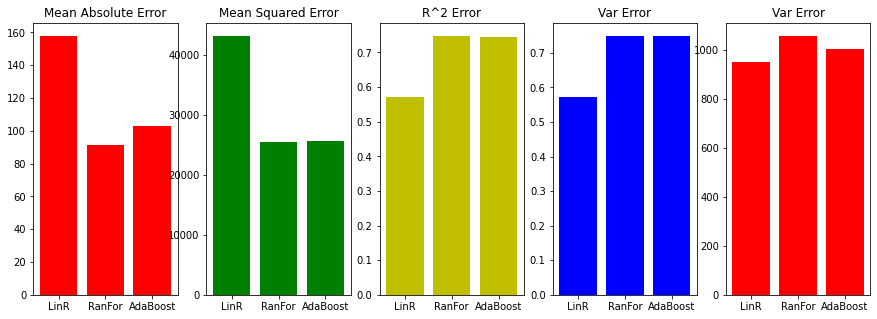

In [125]:
plot_labels = ["LinR", "RanFor", "AdaBoost"]
from math import sqrt

f, [ax1, ax2, ax3, ax4, ax5] = plt.subplots(nrows=1,ncols=5,figsize=(15,5))
ax1.bar(plot_labels,mae_list[4:],color='r')
ax1.set_title("Mean Absolute Error")
ax2.bar(plot_labels,mse_list[4:],color='g')
ax2.set_title("Mean Squared Error")
ax3.bar(plot_labels,r2_list[3:],color='y')
ax3.set_title("R^2 Error")
ax4.bar(plot_labels,var_list[2:],color='b')
ax4.set_title("Var Error")
ax5.bar(plot_labels,max_list[1:],color='r')
ax5.set_title("Var Error")

import operator


In [134]:
train.head()

,Id,UNIXTime,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Radiation,Year,Month,Day,Hour,Minute,Second,SunPerDay,SunPerDayHours
0,4152,1473879005,9/14/2016 12:00:00 AM,08:50:05,57,30.45,68,26.70,4.50,06:10:00,18:26:00,680.04,2016,9,14,8,50,5,0 days 12:16:00,12
1,13047,1476293121,10/12/2016 12:00:00 AM,07:25:21,50,30.47,96,144.96,10.12,06:16:00,18:02:00,277.37,2016,10,12,7,25,21,0 days 11:46:00,12
2,7420,1477993220,10/31/2016 12:00:00 AM,23:40:20,47,30.48,56,119.52,3.37,06:23:00,17:49:00,1.29,2016,10,31,23,40,20,0 days 11:26:00,11
3,6508,1473013505,9/4/2016 12:00:00 AM,08:25:05,57,30.47,93,38.61,2.25,06:08:00,18:35:00,544.75,2016,9,4,8,25,5,0 days 12:27:00,12
4,29110,1481885434,12/16/2016 12:00:00 AM,00:50:34,41,30.23,103,177.55,2.25,06:50:00,17:46:00,1.22,2016,12,16,0,50,34,0 days 10:56:00,11


In [138]:
output = pd.DataFrame({'Id': y_test.index,'Radiation': y_pred})
output.to_csv('solar-radiation-prediction-submission1.csv', index=False, header=False)

In [139]:
output = pd.DataFrame({'Id': y_test1.index,'Radiation': y_pred1})
output.to_csv('solar-radiation-prediction-submission2.csv', index=False, header=False)